# Convert an image to pencil sketch using cv2, python and matplotlib for visualization

### Import Libraries

- `openCV` is the only library which is needed for the project. 
- `matplotlib` library will also be used optionally for some visualizations.

### Steps

1. Read the image in BGR format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. 
2. Then invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details.
3. Finally, create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

### program files

1. `image_to_pencil_sketch.ipynb` - jupyter notebook with step-by-step instructions and visualizations.
2. `image_to_pencil_sketch.py` - interactive python program file for converting images to sketch.

In [1]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

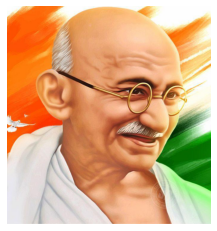

In [2]:
# load the image and view it
# matplotlib interprets images in RGB format, but OpenCV uses BGR format
# so to convert the image so that it's properly loaded, convert it before loading

image = cv2.imread("mahatma_gandhi.jpg")    # this is read in BGR format
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)
plt.axis(False)
plt.savefig('temp.png')
plt.show()

- In interactive python script - use below code to display BGR format image directly.
    ```
    cv2.imshow("Original image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ```
- In google colab, use below code.
    ```
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    ```

#### BGR to RGB convertion methods

1. Method 1:
    ```
    plt.imshow(image[:,:,::-1])
    plt.axis(False)
    plt.savefig('temp.png')
    plt.show()
    ```
2. Method 2:
    ```
    RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis(False)
    plt.savefig('temp.png')
    plt.show()
    ```

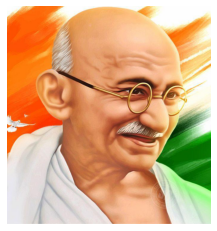

In [3]:
# Convert BGR to RGB: Method 1
plt.imshow(image[:,:,::-1])
plt.axis(False)
plt.savefig('temp1.png')
plt.show()

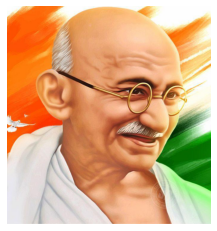

In [4]:
# Convert BGR to RGB: Method 2
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)
plt.axis(False)
plt.savefig('temp2.png')
plt.show()

### Transform photo to pencil sketch

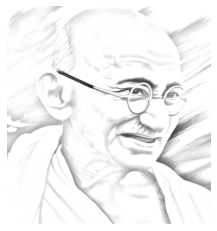

In [5]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# inverting the image
inverted_image = cv2.bitwise_not(gray_image)
# inverted_image = 255 - gray_image

# applying gaussian blur
blurred_image = cv2.GaussianBlur(inverted_image, (111, 111), 0)

# invert the blurred image
inverted_blurred_image = cv2.bitwise_not(blurred_image)

# sketching the image by dividing the gray image with the inverted blurred image
sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale=256)

# save the sketch image
cv2.imwrite("sketch_image.jpg", sketch_image)   # jpg format
# cv2.imwrite("sketch_image.png", sketch_image)   # png format

# display the sketch image
RGB_sketch_image = cv2.cvtColor(sketch_image, cv2.COLOR_GRAY2RGB)
plt.imshow(RGB_sketch_image)
plt.axis(False)
plt.savefig('temp3.png')
plt.show()

### Original image vs sketch
Let's display the original image and sketch side by side for comparison.

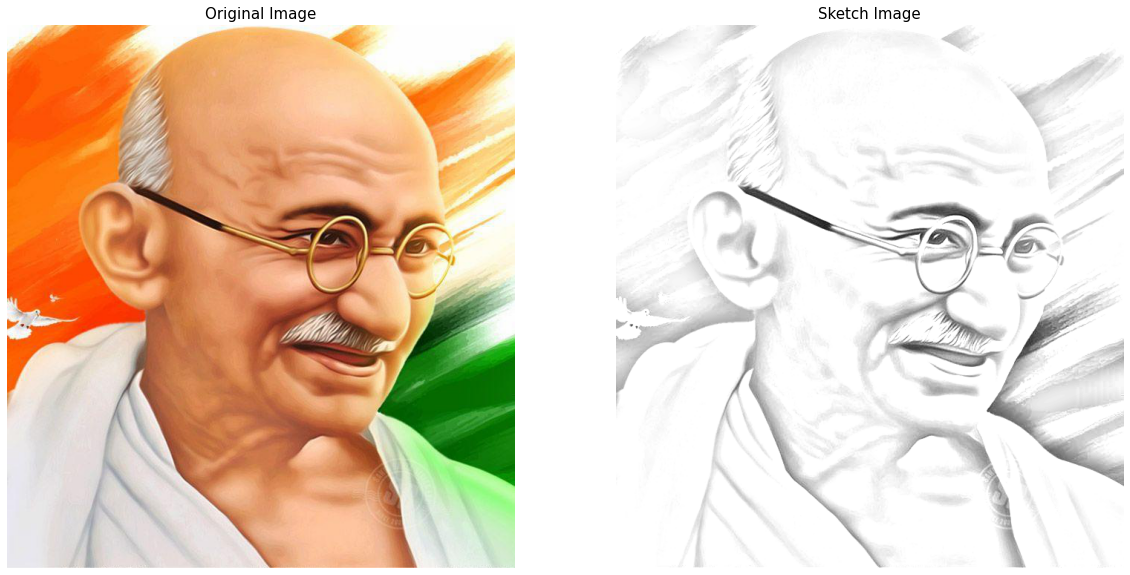

In [6]:
# Let's display the original image and sketch image side by side using matplotlib

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title("Original Image", size=15)
plt.imshow(RGB_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sketch Image", size=15)
RGB_sketch_image = cv2.cvtColor(sketch_image, cv2.COLOR_GRAY2RGB)
plt.imshow(RGB_sketch_image)
plt.axis("off")
plt.savefig('temp4.png')
plt.show()

## Create sketch function
We can combine everything together to create a sketch function:

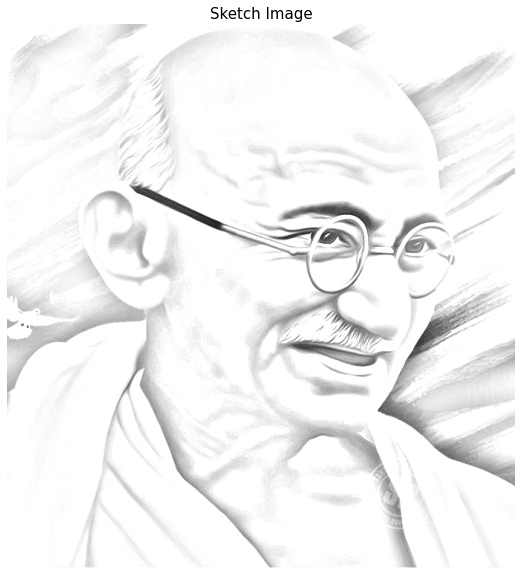

In [7]:
#  Combine everything together to create a function that returns the sketch
#  of an image
def sketch_image(photo, k_size):
    # read the photo
    image = cv2.imread(photo)

    # convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # inverting the image
    inverted_image = cv2.bitwise_not(gray_image)

    # applying gaussian blur
    blurred_image = cv2.GaussianBlur(inverted_image, (k_size, k_size), 0)

    # invert the blurred image
    inverted_blurred_image = cv2.bitwise_not(blurred_image)

    # sketching the image by dividing the gray image with the inverted blurred image
    sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale=256)

    # save the sketch image
    cv2.imwrite("sketch_image.jpg", sketch_image)   # jpg format
    # v2.imwrite("sketch_image.png", sketch_image)   # png format

    # display the sketch image interactively
    # cv2.imshow("sketch image", sketch_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # display the sketch image
    RGB_sketch_image = cv2.cvtColor(sketch_image, cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(20,10))
    plt.title("Sketch Image", size=15)
    plt.imshow(RGB_sketch_image)
    plt.axis(False)
    plt.savefig('temp5.png')
    plt.show()

#  function call
sketch_image(photo="mahatma_gandhi.jpg", k_size=111)

### Next steps

1. Convert notbook to python script
2. Add argparse code to python script to make it interactive - to accept user inputs e.g. specify image to convert
3. Explore ways to publish this python program via smartphone app or fully functional website e.g. using flask or openai codex playground